In [1]:
import os
import sys
import numpy as np
import h5py as h5
import glob

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.colors import LogNorm
import ion_plot_definitions as ipd

import plotting_tools as pt 
#import spec_helper_functions as shf

sys.path.append('../analysis')
import spectrum_analysis_tools as spa


import seaborn as sns
sns.set_style("ticks",{'axes.grid': True, "ytick.major.size": 0.1,
                "ytick.minor.size": 0.05,
                'grid.linestyle': '--'
            })

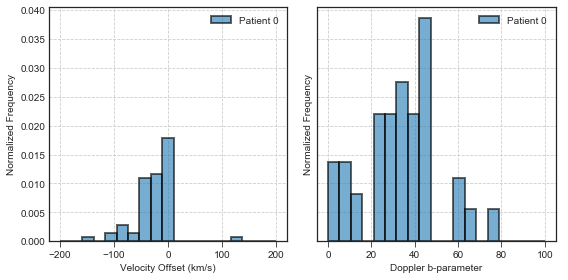

In [2]:
vel = pt.load_data(['vel'])
vel_p0 = pt.load_data(['vel'], model = 'P0')
#vel_stream = pt.load_data(['vel'], model = 'stream')

vel = vel[vel > -1000]
vel_p0 = vel_p0[vel_p0 > -1000]
#vel_stream = 

bval = pt.load_data(['bval'])
bval_p0 = pt.load_data(['bval'], model = 'P0')
#bval_stream = pt.load_data(['bval'], model = 'stream')

bval = bval[bval > -1000]
bval_p0 = bval_p0[bval_p0 > -1000]
#bval_stream = bval_stream[bval_stream > -1000]


fig, ax = plt.subplots(nrows =1, ncols =2, figsize =(8, 4), sharey = True, sharex= False)
lw = 2
ht = 'stepfilled'
ht = 'bar'
dens = True
nbin = np.linspace(-200, 200, 20)
ec = 'black'
alpha = 0.6

ax[0].hist(vel_p0,  bins = nbin, linewidth = lw, histtype = ht, density = dens, label= 'Patient 0', edgecolor = ec, alpha = alpha)
#ax[0].hist(vel_stream, bins = nbin, linewidth = lw, histtype = ht, density = dens, label= 'Streaming', edgecolor = ec, alpha = alpha)
ax[0].legend()
ax[0].set_ylabel('Normalized Frequency')
ax[0].set_xlabel('Velocity Offset (km/s)')

nbin = np.linspace(0, 100, 20)
ax[1].hist(bval_p0,  bins = nbin, linewidth = lw, histtype = ht, density = dens, label= 'Patient 0', edgecolor = ec, alpha = alpha)
#ax[1].hist(bval_stream, bins = nbin, linewidth = lw, histtype = ht, density = dens, label= 'Streaming', edgecolor = ec, alpha = alpha)
ax[1].legend()
ax[1].set_ylabel('Normalized Frequency')
ax[1].set_xlabel('Doppler b-parameter')

fig.tight_layout()
plt.savefig('../../plots/vel_bval_histogram.png', dpi = 300)

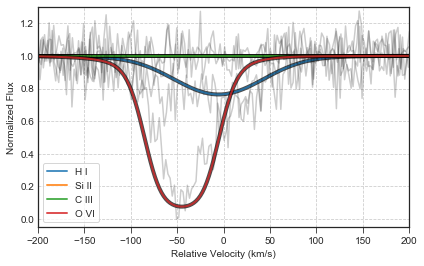

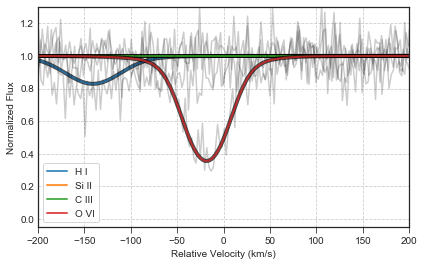

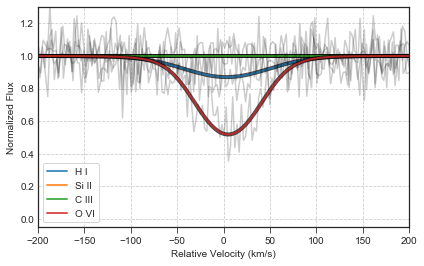

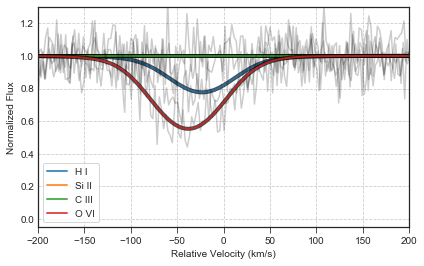

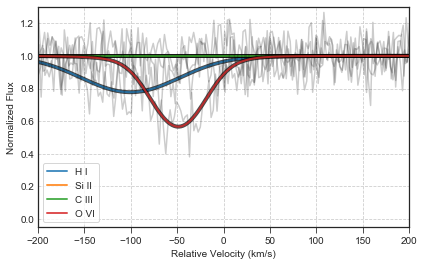

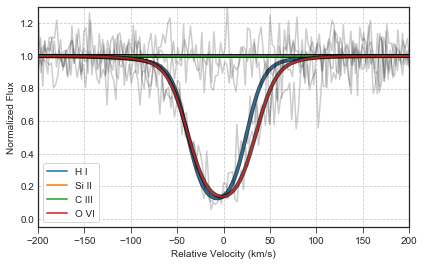

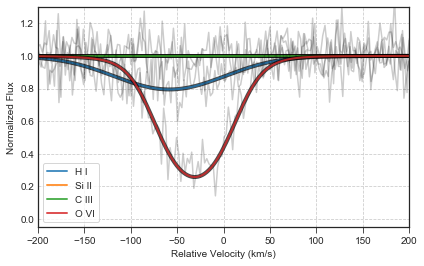

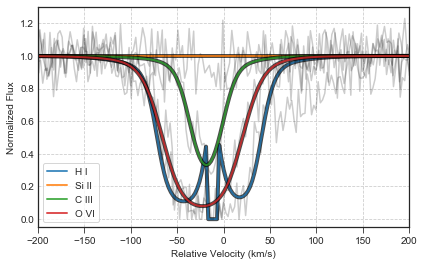

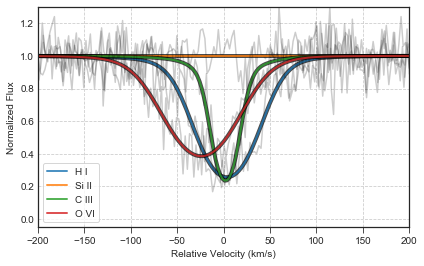

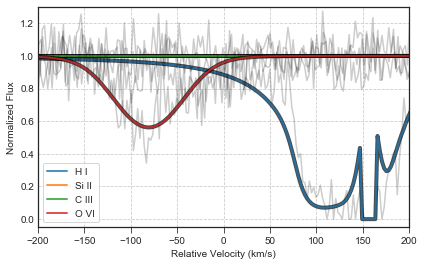

In [4]:
ion_list = ['H I', 'Si II', 'C III', 'O VI']

spec_list = glob.glob('../../data/analyzed_spectra/COS-FUV*')
for spec_path in spec_list:
    spec = os.path.basename(spec_path)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3.8))
    for ion in ion_list:
        vv, flux, vvfit, fluxfit,  wl, wlfit, w0 = spa.load_velocity_data(ion, spec)
        ax.plot(vv, flux, color = 'black', alpha = 0.2)
        if os.path.isfile('../../data/analyzed_spectra/%s/FitInspection.fits'%(spec)):
            ax.plot(vvfit, fluxfit, color = 'black', linewidth = 4, alpha = 0.7)
            ax.plot(vvfit, fluxfit, label = ion, linewidth = 2, alpha = 0.8)
    ax.set_xlim(-200, 200)
    ax.set_ylim(-0.05, 1.3)
    ax.set_xlabel('Relative Velocity (km/s)')
    ax.set_ylabel('Normalized Flux')
    ax.legend(frameon = True)
    fig.tight_layout()
    plt.savefig('../../plots/velocity/%s.png'%(spec), dpi = 300)



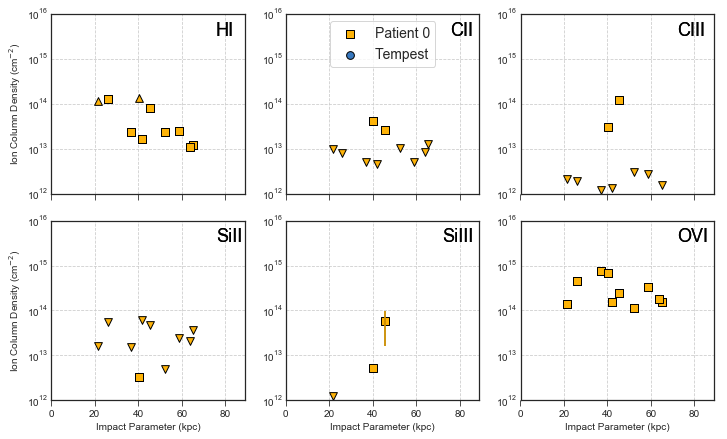

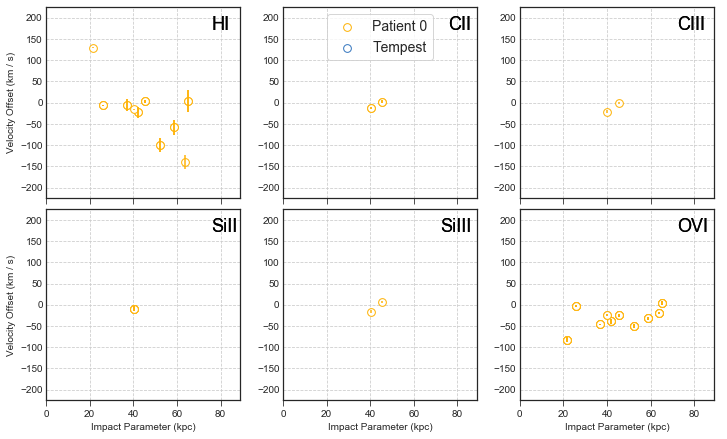

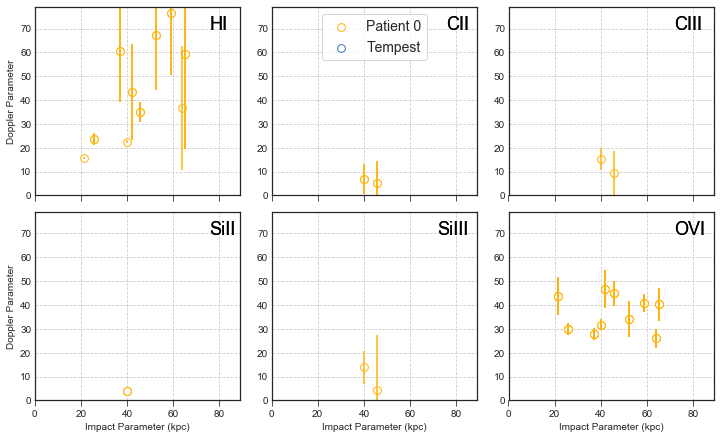

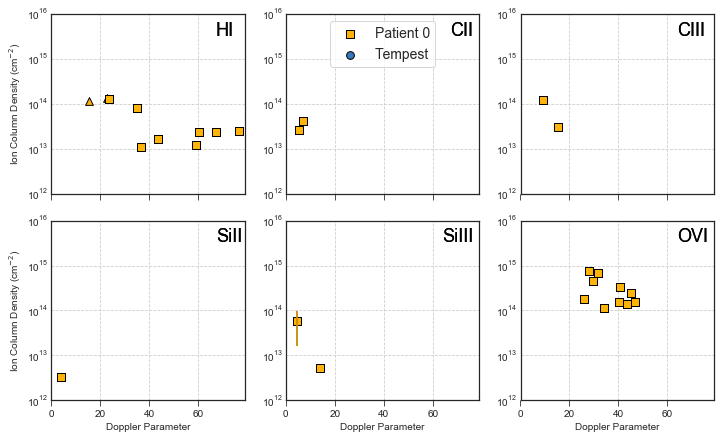

In [5]:
ion_list = ['H I', 'C II', 'C III', 'Si II', 'Si III', 'O VI']
#ion_list = ['H I', 'O VI', 'N V']

xfields = ['impact', 'impact', 'impact', 'bval']
yfields = ['col', 'vel', 'bval', 'col']


for compare in ['model']:
    for xfield, yfield in zip(xfields, yfields):
        nrows = 2; ncols =3;
        fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize=(3.4*ncols, 3.1*nrows), sharex = True, sharey = False)
        figg, aax = pt.plot_multipanel_scatter(ion_list, xfield = xfield, yfield = yfield, nrows = nrows, compare = compare, \
                                           fig = fig, ax = ax, marker_size = 60, set_ylim = True)

        ax[0][1].legend(loc = 'upper center', fontsize = 14, frameon = True)
        plt.savefig('../../plots/%s_%s_%s.png'%(xfield, yfield, compare), dpi = 300)




In [ ]:
ion_list = ['H I', 'C II', 'C III', 'Si II', 'Si III', 'O VI']
#ion_list = ['H I', 'O VI', 'N V']

xfields = ['impact', 'impact', 'impact', 'bval']
yfields = ['col', 'vel', 'bval', 'col']


for compare in ['model']:
    for xfield, yfield in zip(xfields, yfields):
        nrows = 2; ncols =3;
        fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize=(3.4*ncols, 3.1*nrows), sharex = True, sharey = False)
        figg, aax = pt.plot_multipanel_scatter(ion_list, xfield = xfield, yfield = yfield, nrows = nrows, compare = compare, \
                                           fig = fig, ax = ax, marker_size = 60, set_ylim = True)

        ax[0][1].legend(loc = 'upper center', fontsize = 14, frameon = True)
        plt.savefig('../../plots/%s_%s_%s.png'%(xfield, yfield, compare), dpi = 300)


